# One Sample T-test

The one sample $t$-test is a statistical procedure used to determine whether a sample of observations could have been generated by a process with a specific mean. 

**Example:** Suppose you are interested in knowing whether an assembly produces laptops that weigh 3 kg. To test this hypothesis, you could collect a sample of laptop computers from the assembly line, measure their weights, and compare the sample with a value of five using a one-sample $t$-test 

**Hypotheses**
Here are the mathematical representations of the null and alternative hypotheses are defined below:

- $H_0: \mu = \mu_0$
- $H_0: \mu \neq \mu_0$ (two-tailed)
- $H_0: \mu > \mu_0$ (upper-tailed)
- $H_0: \mu < \mu_0$ (lower-tailed)

**Assumptions**

- **Level of Measurement**
the one-sample $t$-test requires the sample data to be numeric and continuous, as it is based on the normal distribution- Continuous data can take on any values within a range (income, height, weight, etc.)

- **Independence**
indepdence of observations is usually not testable, but can reasonably assumed if the data collection process was random without replacement. In our example, we would want to select laptop computers at random without replacement. 

- **Normality** 
to test the assumption of normality, a variety of methods are available, but the simplest is to inspect the data visually using a histogram or a Q-Q (Quantile-Quantile) scatterplot. Real-word data are almost never perfectly normal, so this assumption can be considered reasonably met if the shape looks approximately symmetric and bell-shaped.

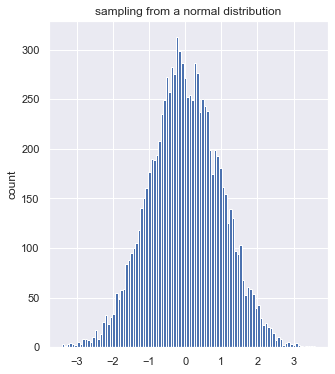

In [1]:
# histogram generated after sampling from a normal distribution

from scipy.stats import norm
import seaborn as sns

sns.set(rc={'figure.figsize':(5,6)})

data_normal = norm.rvs(size=10000,loc=0,scale=1)
ax = sns.distplot(data_normal, kde=False, bins = 100,
                 color= 'b',
                 hist_kws={'alpha': 1})
ax.set(ylabel='count', title = 'sampling from a normal distribution')
pass

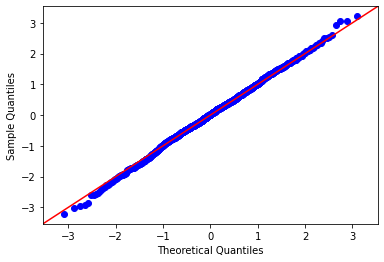

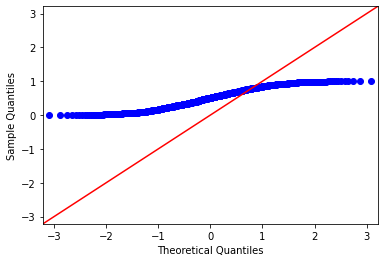

In [13]:
# Quantile-Quantile plot

import numpy as np
import statsmodels.api as sm
import pylab

# sampling from a normal distribution
test_1 = np.random.normal(0,1, 1000)

# sampling from a uniform distribution
test_2 = np.random.uniform(0,1, 1000)

sm.qqplot(test_1, line='45')
sm.qqplot(test_2, line = '45')
pylab.show()


- **Outliers** 
An outlier is data value which is too extreme to belong in the distribution of interest. Let's suppose in our example that the assembly machine ran out of a particular component, resulting in a laptop that was assembled at a much lower weight. This is a condition that is outside of our question of interest, and therefore we can remove that observation prior to conducting the analysis. However, just because a value is extreme does not make it an outlier. Let's suppose that our laptop assembly machine occasionally produces laptops which weigh significantly more or less than five pounds, our target value. In this case, these extreme values are absolutely essential to the question we are asking and should not be removed. Box-plots are useful for visualizing the variability in a sample, as well as locating any outliers.

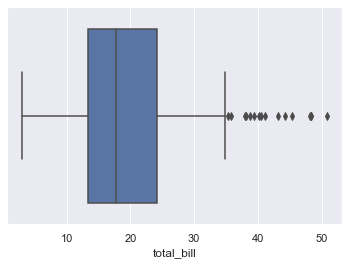

In [28]:
import seaborn as sns
sns.set()
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"], whis = True)

**Procedure to calculate $p$-value**

In testing the null hypothesis that the population mean is equal to a specified value $\mu_0$, one uses the statistic $$ t = \frac{\bar{x} -\mu_0}{s/ \sqrt{n}},$$ where $\bar{x}$ is the sample mean, $s$ is the sample standard deviation and $n$ is the sample size. The degrees of freedom used in this test are $n-1$.

Calculate the probability of observing the test statistic under the null hypothesis. This value is obtained by comparing t to a t-distribution with $(n − 1)$ degrees of freedom.

- $p = 2\text{Pr}(T > |t|)$ (two-tailed)
- $p = \text{Pr}(T > t) $ (upper-tailed)
- $p = \text{Pr}(T < t)  $ (lower-tailed)

In [32]:
# one sample t-test in Python 

data = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]

import scipy.stats as stats

#perform one sample t-test
stats.ttest_1samp(a=data, popmean=15)


Ttest_1sampResult(statistic=-1.6848470783484626, pvalue=0.12014460742498101)

So the t test statistic is $-1.6848$ and the corresponding two-sided p-value is $0.1201$. Because the p-value of our test is greater than $\alpha = 0.05$, we fail to reject the null hypthosis of the test. Given the p and t values from a two-tailed test, you would reject the null hypothesis of a greater-than test when p/2 < $\alpha$, and of a less-than test when p/2 < $\alpha$ and $t < 0$.

**Confidence Interval**
$$ \mu = \bar{x} \pm t \cdot \frac{s}{\sqrt{n}}$$

In [36]:
import scipy.stats

sample = [1,2,3,4,5,6,7,8,9]

confidence_level = 0.95
degrees_freedom = len(sample) - 1
sample_mean = np.mean(sample)
sample_standard_error = scipy.stats.sem(sample)

confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

print(confidence_interval)

(2.8949158625700564, 7.105084137429944)
